In [1]:
import pandas as pd
df=pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
1,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
3,2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
4,2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


In [2]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2838,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2839,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2840,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2841,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100
2842,2021-10-14,815.489990,820.250000,813.349976,818.320007,818.320007,12203200


In [3]:
df.shape

(2843, 7)

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2843 non-null   object 
 1   Open       2843 non-null   float64
 2   High       2843 non-null   float64
 3   Low        2843 non-null   float64
 4   Close      2843 non-null   float64
 5   Adj Close  2843 non-null   float64
 6   Volume     2843 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.6+ KB


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

<Axes: >

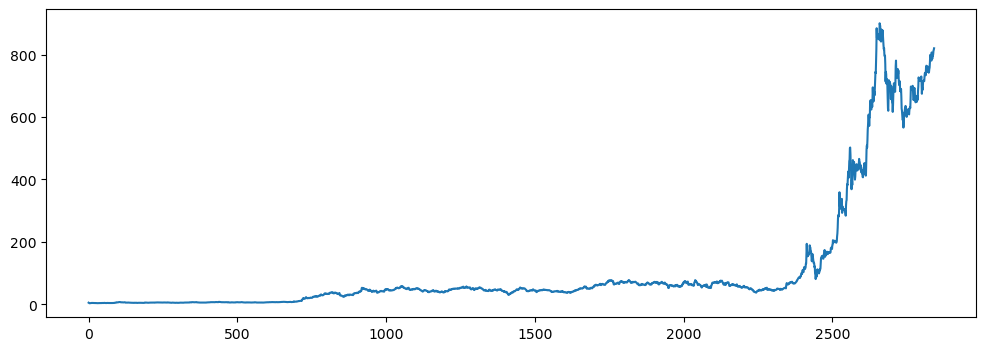

In [7]:
df['High'].plot(figsize=(12,4))

<Axes: >

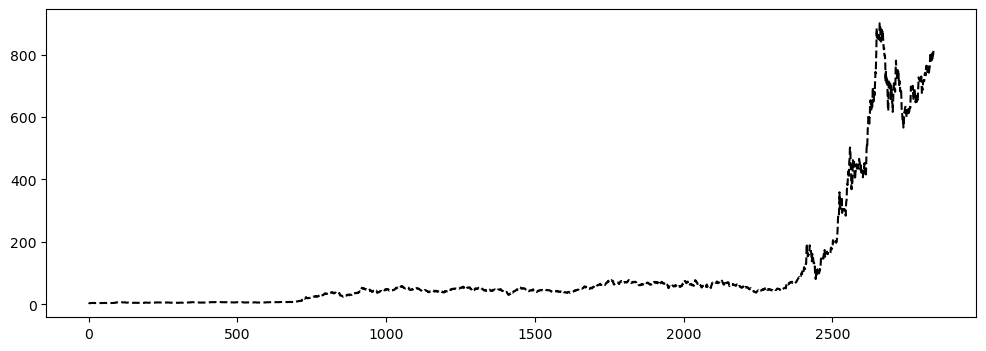

In [8]:
df['High'].plot(figsize=(12,4),ls='--',c='k')

In [9]:
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2843 non-null   datetime64[ns]
 1   Open       2843 non-null   float64       
 2   High       2843 non-null   float64       
 3   Low        2843 non-null   float64       
 4   Close      2843 non-null   float64       
 5   Adj Close  2843 non-null   float64       
 6   Volume     2843 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 155.6 KB


In [11]:
# set date column as index
df=df.set_index(['Date'],drop=True)

In [12]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500
2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000


In [13]:
from datetime import datetime

In [14]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [15]:
datetime.now()

datetime.datetime(2024, 3, 9, 22, 27, 12, 337976)

In [16]:
## Resample Tehnique

<Axes: xlabel='Date'>

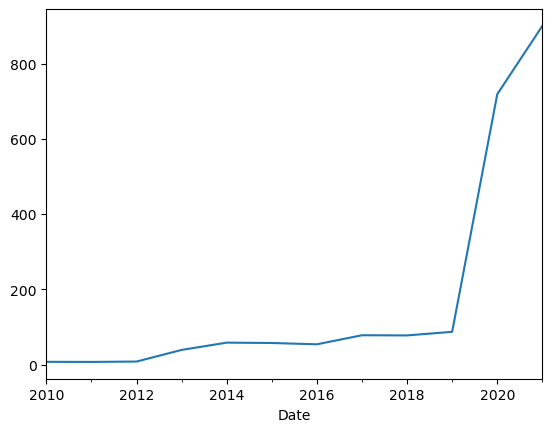

In [17]:
df.resample(rule='A').max()['High'].plot()

<Axes: xlabel='Date'>

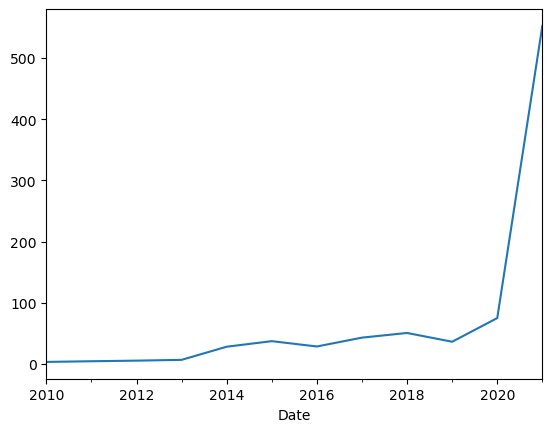

In [18]:
df.resample(rule='A').min()['Open'].plot()

In [19]:
df[df['High']==900.400024]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-25,855.0,900.400024,838.820007,880.799988,880.799988,41173400


In [20]:
df[df['High']==3.326000]


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-07,3.28,3.326,2.996,3.16,3.16,34608500


In [21]:
import seaborn as sns

In [22]:
# sns.barplot(x=df.index,y=df['High'])

In [23]:
df[df.index.year=='2017']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [24]:
df.loc['2017-01-01':'2022-12-31']['High'].min()

37.335999

## SIMPLE MOVING AVEAGE.

<Axes: xlabel='Date'>

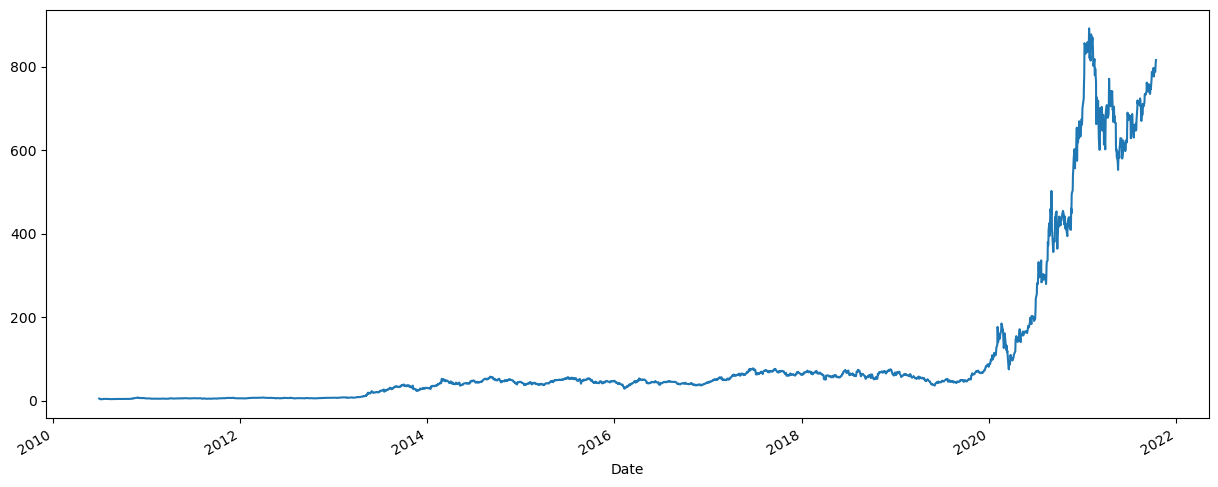

In [25]:
df['Open'].plot(figsize=(15,6))

In [26]:
df['OPEN: 10 DAYS ROLLING']=df['Open'].rolling(window=10).mean()

<Axes: xlabel='Date'>

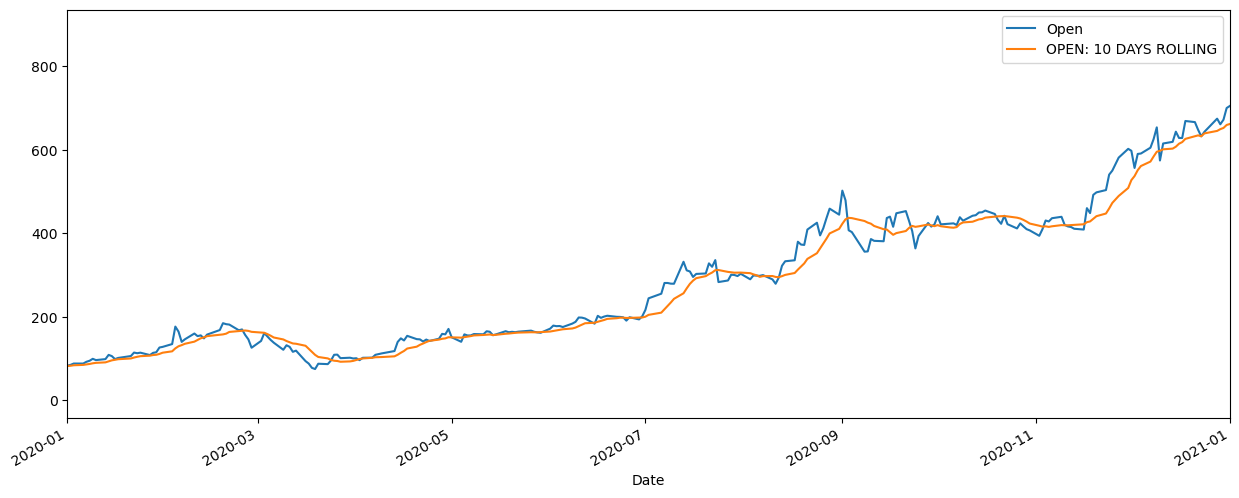

In [27]:
df[['Open','OPEN: 10 DAYS ROLLING']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [28]:
## here we can see the smoothening of curve 

In [29]:
df['OPEN: 50 DAYS ROLLING']=df['Open'].rolling(window=50).mean()

<Axes: xlabel='Date'>

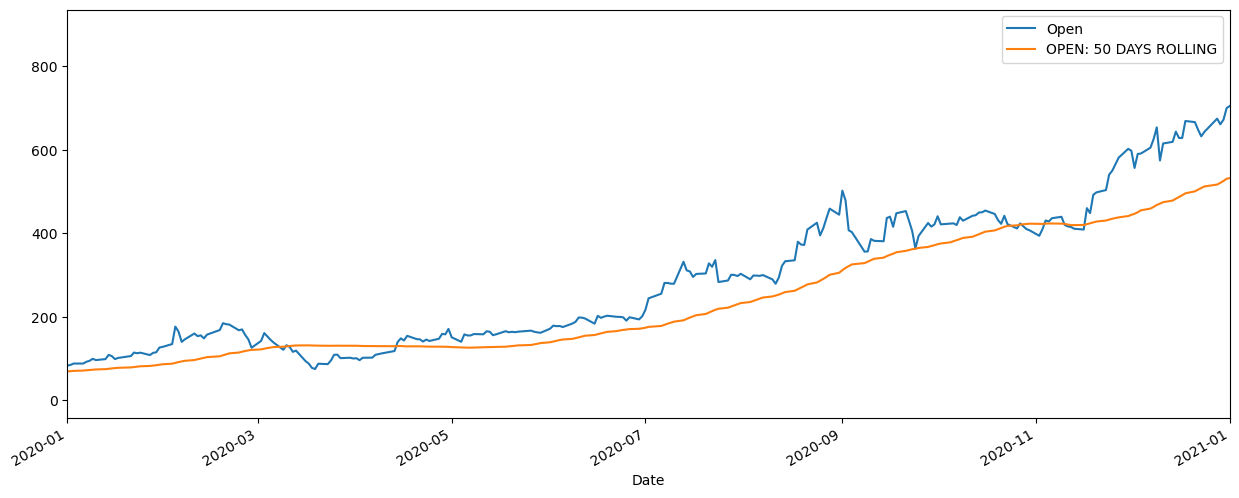

In [30]:
df[['Open','OPEN: 50 DAYS ROLLING']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

<Axes: xlabel='Date'>

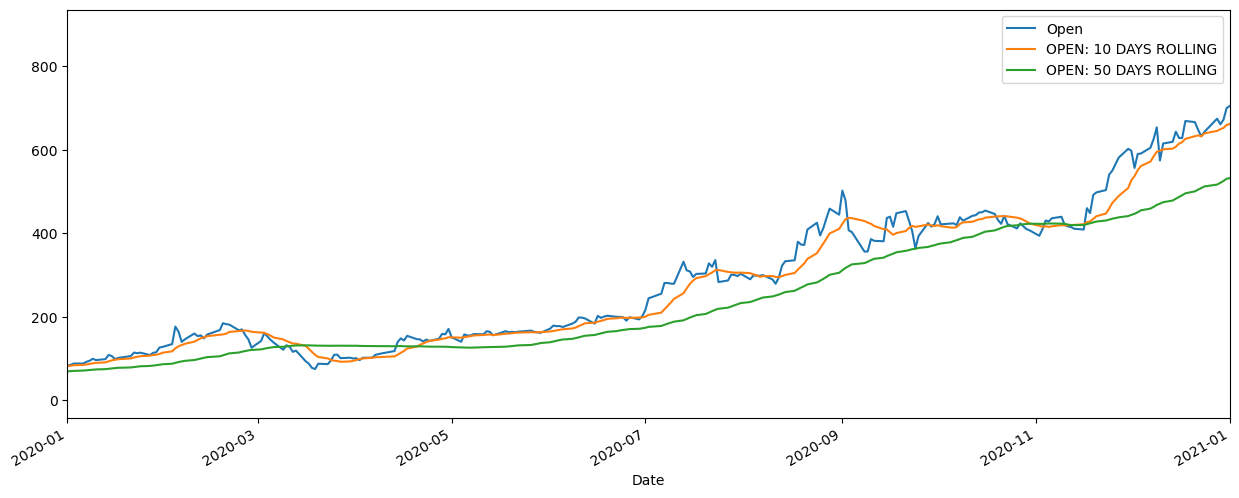

In [31]:
df[['Open','OPEN: 10 DAYS ROLLING','OPEN: 50 DAYS ROLLING']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

## Cumlative Moving Average

In [32]:
df['Open'].expanding().mean()

Date
2010-07-01      5.000000
2010-07-02      4.800000
2010-07-06      4.533333
2010-07-07      4.220000
2010-07-08      4.021600
                 ...    
2021-10-08    104.885359
2021-10-11    105.125769
2021-10-12    105.370684
2021-10-13    105.618784
2021-10-14    105.868475
Name: Open, Length: 2843, dtype: float64

In [33]:
df['Open:Moving Averge']=df['Open'].expanding().mean()

<Axes: xlabel='Date'>

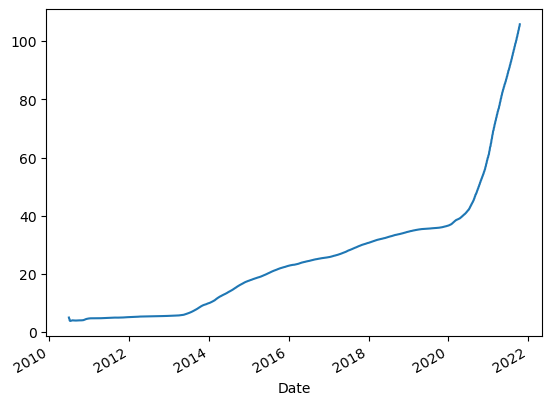

In [34]:
df['Open:Moving Averge'].plot()

<Axes: xlabel='Date'>

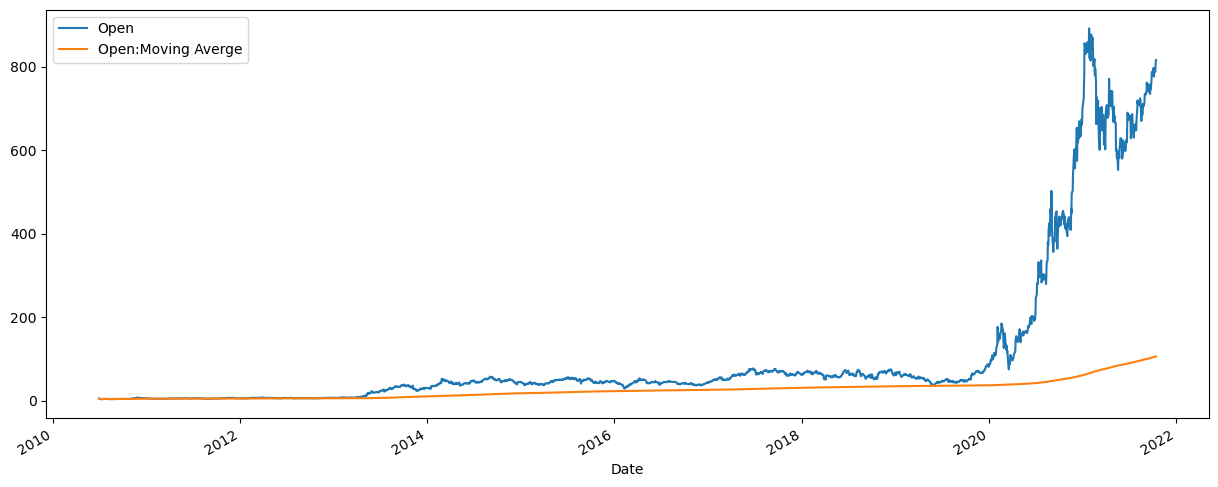

In [35]:
df[['Open','Open:Moving Averge']].plot(figsize=(15,6))

## Exponential Moving Average 

In [36]:
df['EWM_Open']=df['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

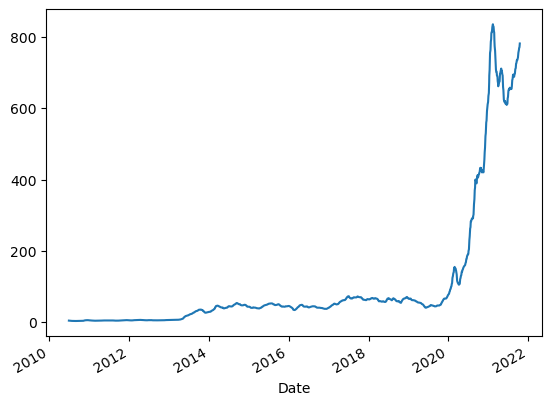

In [37]:
df['EWM_Open'].plot()

<Axes: xlabel='Date'>

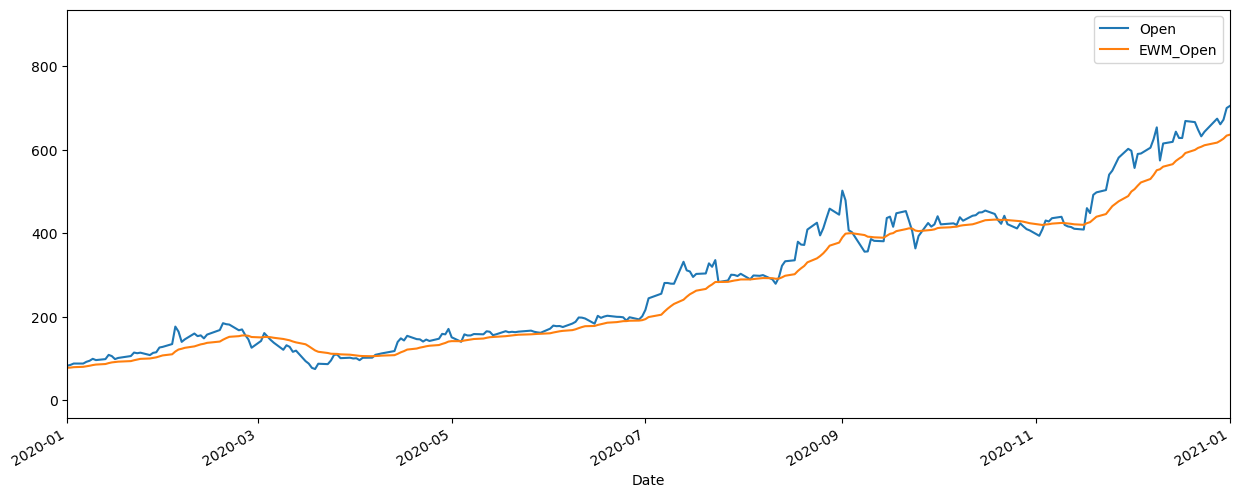

In [38]:
df[['Open','EWM_Open']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

## exponential weighted moving average

Use span parameter for ewma.

In [39]:
df['Open_EWMA=5days']=df['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

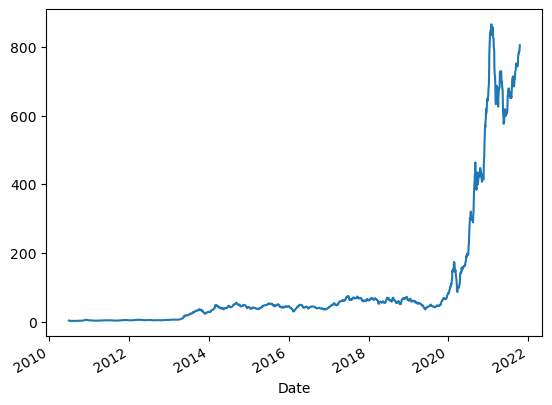

In [40]:
df['Open_EWMA=5days'].plot()

<Axes: xlabel='Date'>

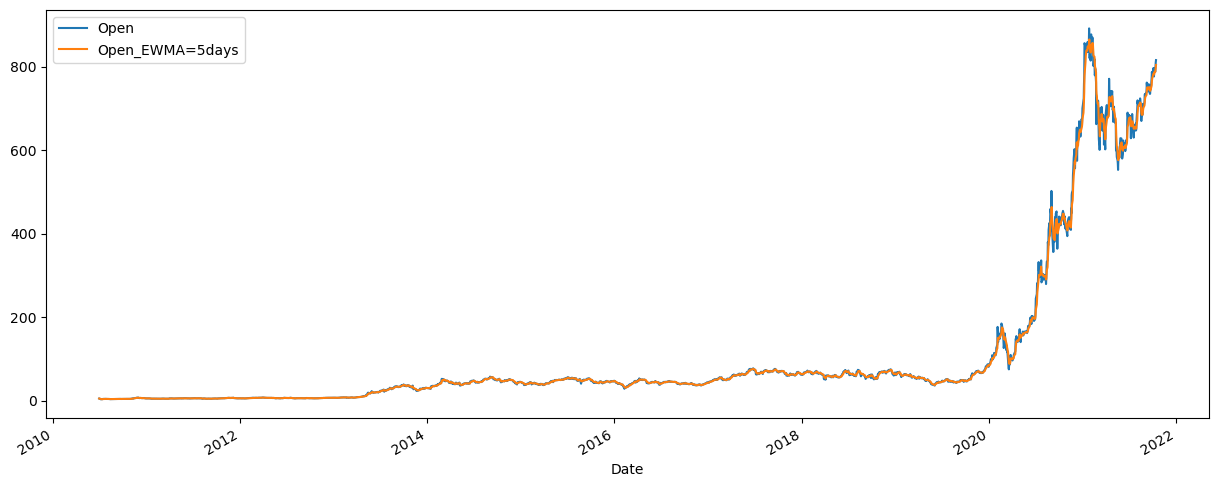

In [41]:
df[['Open','Open_EWMA=5days']].plot(figsize=(15,6))

In [42]:
df1=pd.read_csv('airline_passengers.csv')
df1.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [43]:
df1.columns

Index(['Month', 'Thousands of Passengers'], dtype='object')

In [44]:
import matplotlib.pyplot as plt
import statsmodels.api as sms
%matplotlib inline

In [45]:
df1.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [46]:
df1.shape

(145, 2)

In [47]:
df1.dropna(axis=0,inplace=True)

In [48]:
df1.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [49]:
df1.shape

(144, 2)

In [50]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [51]:
df1['Month']=pd.to_datetime(df1['Month'])

In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [53]:
df1.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [54]:
df1.set_index('Month',inplace=True)

In [55]:
df1.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

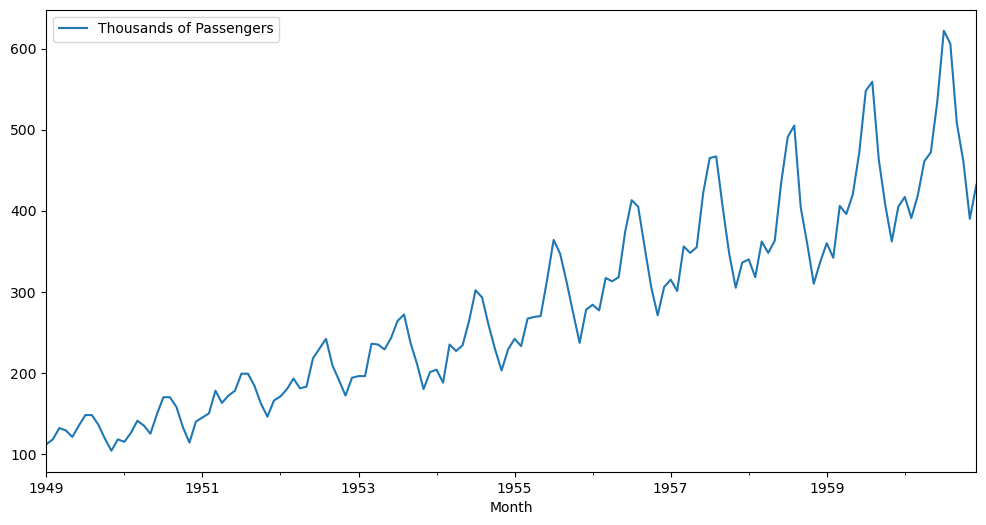

In [69]:
df1.plot(figsize=(12,6))

<Axes: xlabel='Date'>

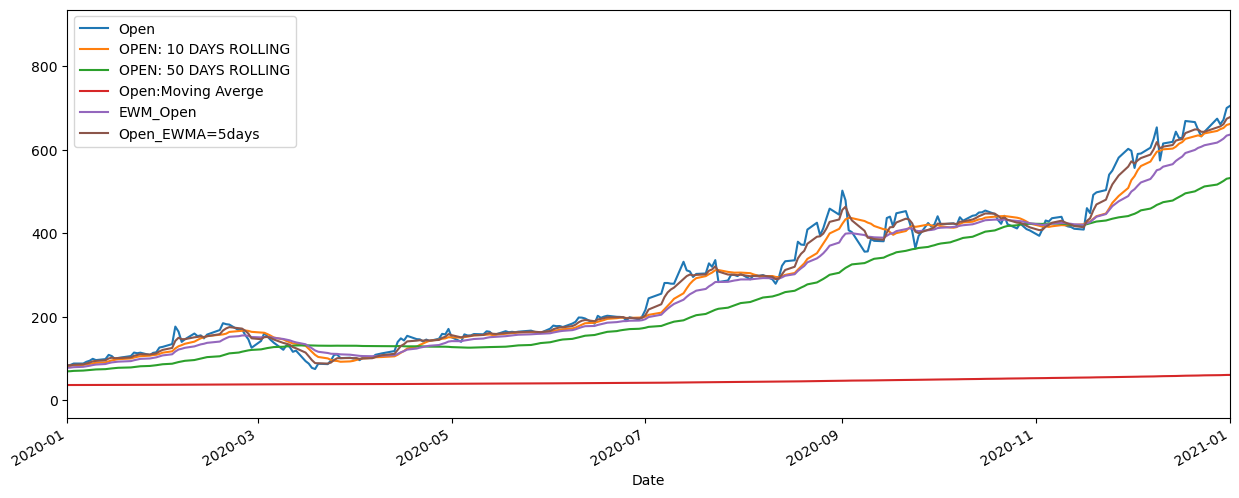

In [68]:
df[['Open','OPEN: 10 DAYS ROLLING','OPEN: 50 DAYS ROLLING','Open:Moving Averge','EWM_Open','Open_EWMA=5days']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2843 entries, 2010-07-01 to 2021-10-14
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   2843 non-null   float64
 1   High                   2843 non-null   float64
 2   Low                    2843 non-null   float64
 3   Close                  2843 non-null   float64
 4   Adj Close              2843 non-null   float64
 5   Volume                 2843 non-null   int64  
 6   OPEN: 10 DAYS ROLLING  2834 non-null   float64
 7   OPEN: 50 DAYS ROLLING  2794 non-null   float64
 8   Open:Moving Averge     2843 non-null   float64
 9   EWM_Open               2843 non-null   float64
 10  Open_EWMA=5days        2843 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 331.1 KB
